In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [2]:
# Configuración del modelo
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3 # Forma de la imagen
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1
input_shape = (img_width, img_height, img_num_channels)

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
# CIFAR: https://www.cs.toronto.edu/~kriz/cifar.html
assert train_images.shape == (50000, 32, 32, 3) # Forma tensor juego imágenes de entrenamiento
assert test_images.shape == (10000,32,32,3) # Forma tensor juego imágenes de test
assert train_labels.shape == (50000,1) # Forma tensor etiquetas de entrenamiento
assert test_labels.shape == (10000,1) # Forma tensor etiquetas de test

169001437/169001437 [==============================] - 3s 0us/step


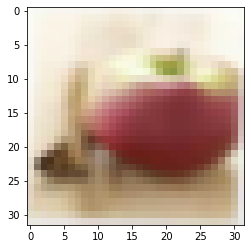

In [4]:
# Pintamos la tercera imagen de entrenamiento (la número 2 en el array)
image = train_images[2]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

In [5]:
print(train_images[2].shape)
print(train_images[2])

(32, 32, 3)
[[[250 250 248]
  [248 249 243]
  [247 248 239]
  ...
  [250 250 246]
  [250 250 246]
  [249 250 246]]

 [[250 251 245]
  [248 249 238]
  [247 247 234]
  ...
  [251 251 242]
  [251 252 243]
  [250 251 243]]

 [[251 251 244]
  [250 248 237]
  [250 245 233]
  ...
  [250 249 238]
  [250 249 240]
  [250 249 242]]

 ...

 [[221 213 191]
  [221 206 176]
  [225 207 181]
  ...
  [199 176 134]
  [207 193 165]
  [233 229 226]]

 [[225 223 204]
  [227 219 196]
  [229 216 200]
  ...
  [204 185 151]
  [212 201 180]
  [234 232 228]]

 [[233 233 226]
  [234 232 224]
  [235 230 225]
  ...
  [219 209 194]
  [223 216 207]
  [232 230 228]]]


In [6]:
# Normalizar imágenes de entrenamiento y de test
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [7]:
print (train_images.shape)
print (train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
# Crear el Modelo de red neuronal CNN con:
# stride = 1
# ventanas convolucionales de 3x3
# ventanas de pooling de 2x2
# funciones de activación 'relu'
# 3 capas convolucionales con 32, 64 y 28 filtros respectivamente
# Aplanamos la última salida y añadimos dos capas densas con función activación 
# 'relu' de 256 y 128 neuronas cada una.
# Tenemos en cuenta el número de clases a clasificar para poner la capa final
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1,  activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1,1),  activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(28, (3, 3), strides=(1,1),  activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(100,activation='softmax')) # Última capa

model.summary()

In [ ]:
# Compilamos el modelo con métrica preción
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=no_classes,
          epochs=no_epochs,
          verbose=verbosity)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/100
500/500 [==============================] - 75s 148ms/step - loss: 4.0906 - accuracy: 0.0706
Epoch 2/100
500/500 [==============================] - 69s 138ms/step - loss: 3.4859 - accuracy: 0.1663
Epoch 3/100
263/500 [==============>...............] - ETA: 32s - loss: 3.2452 - accuracy: 0.2031

In [ ]:
# Ejecutamos el entrenamiento con el validation_split explicitado anteriormente


In [ ]:
# Generamos las métricas de generalización
score = model.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()